<div style="background-color: #d9ffd4; padding: 20px; border-radius: 10px;">
    <h1 style="color: #2F4F4F; font-family: Calibri, sans-serif; text-align: center;">Jornada 8</h1>
    <p style="color: #2F4F4F; font-family: Calibri, Courier, monospace; text-align: center; font-size: 24px;">
        Serie y Transformada de Fourier
    </p>
</div>

Las series y transformadas de Fourier son herramientas matemáticas fundamentales en física computacional y desempeñan un papel central en múltiples áreas de la astrofísica. Su relevancia radica en la posibilidad de representar una **señal** o **función compleja** como una superposición de modos elementales, típicamente ondas sinusoidales de distintas **frecuencias**, **amplitudes** y **fases**.

Esta descomposición permite revelar la estructura interna de un fenómeno físico que, en el dominio temporal o espacial, puede resultar difícil de interpretar. Al trasladar el problema al dominio de la frecuencia, se separan escalas, se identifican periodicidades dominantes y se distinguen componentes físicas con comportamientos característicos.

En el contexto astrofísico, las técnicas de Fourier se aplican de manera transversal en diversos problemas, entre los que destacan:

- **Procesamiento de señales observacionales:** análisis de datos provenientes de radiotelescopios, fotometría estelar y detección de ondas gravitacionales, donde la información relevante suele estar codificada en patrones periódicos.

- **Reducción y filtrado de ruido:** separación entre señal física y ruido instrumental o ambiental, permitiendo mejorar la relación señal–ruido y extraer información fiable de mediciones altamente contaminadas.

- **Análisis espectral:** estudio de la distribución en frecuencias o longitudes de onda de la radiación electromagnética, clave para inferir la composición química, temperatura, velocidad radial y campos magnéticos de estrellas, galaxias y nebulosas.

- **Dinámica y variabilidad astrofísica:** identificación de períodos orbitales, modos de oscilación estelar y resonancias en sistemas dinámicos complejos.

<!-- La capacidad de trabajar en el dominio de la frecuencia resulta, por tanto, esencial para interpretar fenómenos astrofísicos cuya manifestación observable es inherentemente oscilatoria o periódica. En este sentido, las herramientas de Fourier no solo facilitan el análisis numérico, sino que actúan como un puente conceptual entre los datos observacionales y los modelos físicos que describen el comportamiento del universo. -->

### **Serie de Fourier**

<div style="background-color: #d4eeff; color: black; padding: 10px; border-radius: 5px;">

#### **Definición:**

La **Serie de Fourier** permite representar una función periódica $y(t)$ como una suma infinita de funciones sinusoidales (seno y coseno). Matemáticamente, para una función $y(t)$ definida en un intervalo $[-T/2, T/2]$ y periódica con periodo $T$, su representación en serie de Fourier está dada por:

$$
y(t) = a_0 + \sum_{n=1}^\infty \left[ a_n \cos\left(\frac{2n\pi t}{T}\right) + b_n \sin\left(\frac{2n\pi t}{T}\right) \right],
$$

donde:

- $a_0$ es el término constante o coeficiente promedio, calculado como:
  $$
  a_0 = \frac{1}{T} \int_{-T/2}^{T/2} y(t) \, dt
  $$

- $a_n$ y $b_n$ son los coeficientes de Fourier, calculados como:
  $$
  a_n = \frac{2}{T} \int_{-T/2}^{T/2} y(t) \cos\left(\frac{2n\pi t}{T}\right) \, dt
  $$
  $$
  b_n = \frac{2}{T} \int_{-T/2}^{T/2} y(t) \sin\left(\frac{2n\pi t}{T}\right) \, dt
  $$

La serie de Fourier converge a $y(t)$ bajo ciertas condiciones (como la continuidad a tramos y la existencia de derivadas a tramos), haciendo que esta representación sea muy útil para analizar y descomponer señales periódicas.

</div>


#### **Primer ejemplo: descomposición en Serie de Fourier de una Función Escalonada**

Consideremos la función escalonada $y(t)$ definida en el intervalo $[-\pi, \pi]$ como:

$$
y(t) =
\begin{cases} 
-1, & -\pi < t < 0, \\
1, & 0 < t < \pi.
\end{cases}
$$

<p align="center">
  <img src="escalonada.png" width="50%">
</p>

Esta función es periódica con periodo $2\pi$. Queremos encontrar su descomposición en serie de Fourier.

##### **Resultados de los Coeficientes**

1. Coeficiente $a_0 = 0$

2. Coeficientes $a_n = 0$, para todo $n$ 

3. Coeficientes $b_n = \frac{4}{n\pi}$, para $n$ impar y $b_n=0$ para $n$ par.

La **serie de Fourier** de la función escalonada $y(t)$ se puede escribir como:

$$
y(t) = \sum_{n=1, \, n \, \text{impar}}^\infty \frac{4}{n\pi} \sin(nt)
$$

Este resultado muestra que la función escalonada se reconstruye solo con términos de seno de frecuencias impares, y los coeficientes decrecen como $ \frac{1}{n} $ en términos de $n$.

Desde un punto de vista computacional, no es posible calcular una serie de infinitos términos, por lo que debemos elegir un $N$ máximo de términos para aproximar la función:

$$
y(t) = \sum_{n=1, \, n \, \text{impar}}^\infty \frac{4}{n\pi} \sin(nt) \approx \sum_{n=1, \, n \, \text{impar}}^N \frac{4}{n\pi} \sin(nt) 
$$

A continuación, se presenta la descomposición (o expansión) en serie de Fourier de la función escalonada para diferentes valores de $N$:


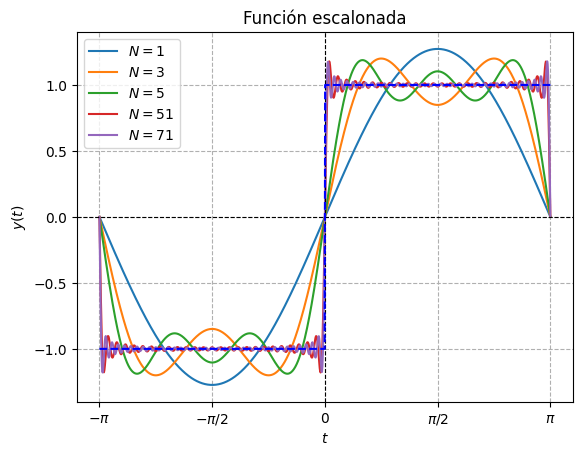

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Definimos la función escalonada original correctamente
def step_function(t):
    return np.where(t < 0, -1, 1)  # -1 para t < 0 y 1 para t >= 0

# Aproximación de la Serie de Fourier
def fourier_series(t, n_terms):
    result = np.zeros_like(t)
    for n in range(1, n_terms + 1, 2):  # Solo usamos n impar
        result += (4 / (np.pi * n)) * np.sin(n * t)
    return result

# Dominio de la función
t = np.linspace(-np.pi, np.pi, 1000)

# Número de términos de la serie de Fourier
n_terms_list = [1, 3, 5, 51, 71]

# Graficamos la función original
plt.figure(
    #figsize=(8, 5)
    )

# Graficamos las aproximaciones con diferentes términos
for n_terms in n_terms_list:
    y_approx = fourier_series(t, n_terms)
    plt.plot(t, y_approx, label=f"$N={n_terms}$")

# Configuramos el gráfico
plt.title("Función escalonada")
plt.xlabel("$t$")
plt.ylabel("$y(t)$")
plt.axhline(0, color="k", linestyle="--", linewidth=0.8)
plt.axvline(0, color="k", linestyle="--", linewidth=0.8)

# cambiar el formato de los números del eje x para mostrarlos en términos de pi
xticks = [-np.pi, -np.pi/2, 0, np.pi/2, np.pi]
xticklabels = [f"$-\pi$", f"$-\pi/2$", "0", f"$\pi/2$", f"$\pi$"]
plt.xticks(xticks, labels=xticklabels)
plt.plot(t, step_function(t), label="", color="blue", linewidth=1.5, linestyle="--")

plt.legend()

plt.grid(ls="--")
plt.show()

Ahora, en lugar de calcular analíticamente los coeficientes de la serie de Fourier, abordaremos el problema desde una perspectiva numérica. Es decir, usaremos **integración numérica** para estimar los coeficientes $a_0$, $a_n$ y $b_n$, lo que nos permitirá construir la expansión en serie de Fourier incluso cuando la función de interés no admita una integración exacta o tenga una forma compleja.

Este enfoque es especialmente relevante en física computacional y astrofísica, donde las funciones suelen provenir de **datos discretos**, **simulaciones numéricas** o **modelos sin expresión analítica cerrada**. Al calcular los coeficientes de Fourier de manera numérica, el método se vuelve completamente generalizable, aplicable a cualquier función integrable definida en un intervalo finito.

Para realizar las integraciones utilizaremos la función `quad` del módulo `scipy.integrate`, que implementa algoritmos adaptativos de alta precisión. A modo ilustrativo, consideremos el siguiente ejemplo simple de integración numérica:


$$ \int_0^1 x^2\, dx = \left. \frac{x^3}{3} \right |_0^1 = \frac{1}{3} \approx 0.33333  $$

La función `quad` debe su nombre al término *quadrature*, utilizado en análisis numérico para referirse al cálculo aproximado de integrales definidas. En esencia, `quad` estima el área bajo una curva mediante métodos de integración adaptativos, ajustando automáticamente la precisión del cálculo.

Para una descripción detallada del algoritmo, sus parámetros y ejemplos de uso, se recomienda consultar la documentación oficial:

https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html



In [2]:
# si no tiene instalado scipy, descomente la siguiente línea de código y ejecute esta celda
#!pip install scipy

In [3]:
from scipy.integrate import quad

# Definimos la función a integrar
def f(x):
    return x**2

# Intervalo de integración
a, b = 0, 1

# Usamos quad para calcular la integral
result, error = quad(f, a, b)

# Mostramos el resultado y el error estimado
print(f"Resultado de la integral: {result}")
print(f"Error estimado: {error}")

# Resultado analítico esperado
expected = 1 / 3
print(f"Resultado esperado: {expected}")

Resultado de la integral: 0.33333333333333337
Error estimado: 3.700743415417189e-15
Resultado esperado: 0.3333333333333333


Ahora que ya sabemos como usar `quad`, definiremos la función `fourier_series(t, y, T, N)` para calcular la serie de Fourier de cualquier función, y luego la usaremos para expandir la función escalonada:

C:\Users\Omar\AppData\Local\Temp\ipykernel_1656\2683639158.py:39: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  b_n[n - 1], _ = quad(lambda t: y(t) * np.sin(2 * n * np.pi * t / T), -T / 2, T / 2)
C:\Users\Omar\AppData\Local\Temp\ipykernel_1656\2683639158.py:33: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain f

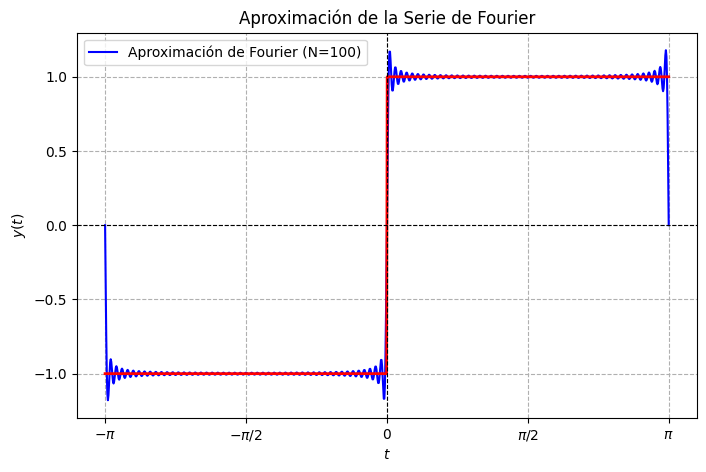

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

def fourier_series(t, y, T, N):
    """
    Calcula la aproximación de la serie de Fourier para una función periódica.

    Parámetros:
    - t: Puntos donde evaluar la aproximación de Fourier.
    - y: Función periódica para la cual calcular la serie de Fourier.
    - T: Período de la función.
    - N: Número de términos en la serie de Fourier.

    Retorna:
    - Aproximación de la serie de Fourier en los puntos t.
    """
    # Coeficiente a_0
    a_0, _ = quad(y, -T / 2, T / 2)
    a_0 /= T

    # Inicializamos la aproximación con a_0
    fourier_approx = a_0

    # Coeficientes a_n y b_n
    a_n = np.zeros(N)
    b_n = np.zeros(N)

    for n in range(1, N + 1):
        # Coeficiente a_n
        # Usamos una función lambda para multiplicar y(t) por cos(2 * n * pi * t / T)
        # para obtener el integrando necesario para calcular a_n
        a_n[n - 1], _ = quad(lambda t: y(t) * np.cos(2 * n * np.pi * t / T), -T / 2, T / 2)
        a_n[n - 1] *= 2 / T

        # Coeficiente b_n
        # Similarmente, usamos una función lambda para multiplicar y(t) por sin(2 * n * pi * t / T)
        # para obtener el integrando necesario para calcular b_n
        b_n[n - 1], _ = quad(lambda t: y(t) * np.sin(2 * n * np.pi * t / T), -T / 2, T / 2)
        b_n[n - 1] *= 2 / T

        # Agregamos los términos de la serie de Fourier
        fourier_approx += a_n[n - 1] * np.cos(2 * n * np.pi * t / T) + b_n[n - 1] * np.sin(2 * n * np.pi * t / T)

    return fourier_approx

# Definir la función y(t), por ejemplo, una función escalonada
def step_function(t):
    return np.where(t < 0, -1, 1)

# Intervalo [0, 2pi] (con T = 2pi)
T = 2 * np.pi
t_values = np.linspace(-T / 2, T / 2, 1000)

# Número de términos de la serie de Fourier
N = 100

# Calculamos la aproximación de Fourier
f_approx = fourier_series(t_values, step_function, T, N)

# Graficamos la aproximación
plt.figure(figsize=(8, 5))
plt.plot(t_values, f_approx, label=f"Aproximación de Fourier (N={N})", color="blue", linewidth=1.5)
plt.plot(t, step_function(t), color="r", lw=2)
plt.title("Aproximación de la Serie de Fourier")
plt.xlabel("$t$")
plt.ylabel("$y(t)$")
plt.axhline(0, color="k", linestyle="--", linewidth=0.8)
plt.axvline(0, color="k", linestyle="--", linewidth=0.8)
plt.grid(ls="--")
plt.legend()

# Cambiar el formato de los números del eje x para mostrarlos en términos de pi
xticks = [-np.pi, -np.pi/2, 0, np.pi/2, np.pi]
xticklabels = [f"$-\pi$", f"$-\pi/2$", "0", f"$\pi/2$", f"$\pi$"]
plt.xticks(xticks, labels=xticklabels)

plt.show()


<div style="background-color: #FFF9AD; color: black; padding: 10px; border-radius: 5px;">

#### **Ejercicio: Función lineal**

Determine la expansión en serie de Fourier de la función $y(t) = t$ definida en el intervalo $[-\pi, \pi]$. Use $N=30$ términos.

</div>


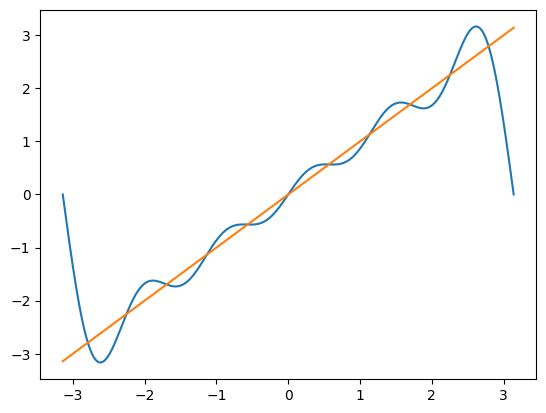

In [ ]:
# su código acá



<div style="background-color: #FFF9AD; color: black; padding: 10px; border-radius: 5px;">

#### **Ejercicio: Función polinómica**

Determine la expansión en serie de Fourier de la función  $y(t) = 0.01t^7 - 0.3t^5 + 1.5t^3 - t$ definida en el intervalo $[-\pi, \pi]$. Use $N = 30$ términos.

</div>


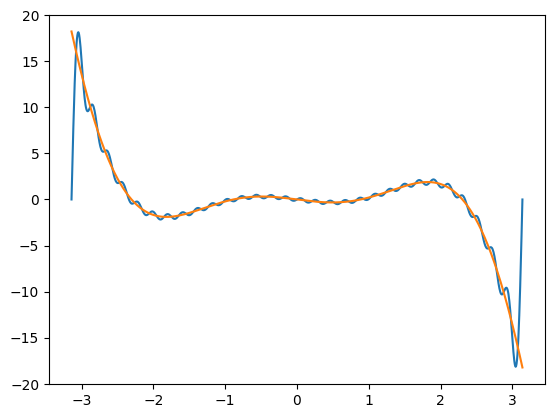

In [ ]:
# su código acá


### **Transformada de Fourier**

La Transformada de Fourier es una herramienta matemática fundamental en muchos campos de la ciencia y la ingeniería. Su principal aplicación es en el análisis de funciones y señales, descomponiéndolas en componentes de frecuencia. A través de la transformada de Fourier, podemos convertir una señal en el dominio del tiempo (o del espacio) a una representación en el dominio de la frecuencia.

<p align="center">
  <img src="tf_esquema.png" width="80%">
</p>

<div style="background-color: #d4eeff; color: black; padding: 10px; border-radius: 5px;">

#### **Definición**

La transformada de Fourier generaliza la idea de la serie de Fourier y puede ser aplicada a funciones no periódicas. A diferencia de la serie de Fourier, que trabaja únicamente con funciones periódicas, la transformada de Fourier permite convertir cualquier función $y(t)$ en una suma continua de funciones sinusoidales. Se define como:

$$  Y(\omega) =  \int_{-\infty}^{\infty} y(t) e^{-i\omega t} \, dt $$

donde $Y(\omega)$ es la representación de la función en el dominio de la frecuencia (o espectro de frecuencia), y 
$\omega$ es la frecuencia angular.

#### **Definición: Transformada de Fourier Discreta (DFT)**

En la práctica, las señales que procesamos suelen ser muestreadas en lugar de continuas. Esto significa que en lugar de una función $y(t)$ definida en un tiempo continuo $t$, disponemos de un conjunto discreto de muestras de la señal, $y(t_k)$, obtenidas a intervalos regulares:

$$ t \longrightarrow t_k = k \Delta t$$
$$ y(t) \longrightarrow y(t_k) = y_k $$

$$ k = 0,1,2,...,N $$

<p align="center">
  <img src="discrete_signal.png" width="60%">
</p>

Para trabajar con estas señales, utilizamos la **Transformada de Fourier Discreta (DFT)**.

La DFT convierte una señal discreta $y_k$ en su representación en el dominio de la frecuencia $Y(\omega_n)=Y_n$, y está definida como:

$$ Y_n = \sum_{k=0}^{N} y_k e^{-2\pi i kn/N} ~~,~~n=0,1,2,...,N$$

$$ \omega_n = \frac{2\pi n}{N \Delta t} = \frac{2\pi n f_s}{N} \longrightarrow f_n = \frac{\omega_n}{2 \pi} = \frac{n}{N \Delta t} = \frac{nf_s}{N}~~;~~f_s = \frac{1}{\Delta t} $$

1. $N$: número total de muestras de la señal
2. $y_k$: señal discreta en el dominio del tiempo $t_k$
3. $Y_n$: espectro discreto en el dominio de frecuencias $\omega_n$
4. $f_s$: frecuencia de muestreo de la señal

</div>


Analicemos la siguiente señal:

$$ \begin{align*} 
y(t) & = A_1 \sin(\omega_1 t) + A_2 \sin(\omega_2 t) + A_3 \sin(\omega_3 t) \\
 & = A_1 \sin(2 \pi f_1 t) + A_2 \sin(2 \pi f_2 t) + A_3 \sin(2 \pi f_3 t)
\end{align*}
$$

donde:

- $A_1=3$, $f_1 = 2$ Hz
- $A_2=1.5$, $f_2 = 4$ Hz,
- $A_3=1$, $f_3=10$ Hz

es decir:

$$ y(t)  = 3 \sin(4 \pi t) + 1.5 \sin(8 \pi t) + 1 \sin(20 \pi t) $$

Para $t \in [0, 2]$ (s), es decir, periodo $T = 2$ (s).

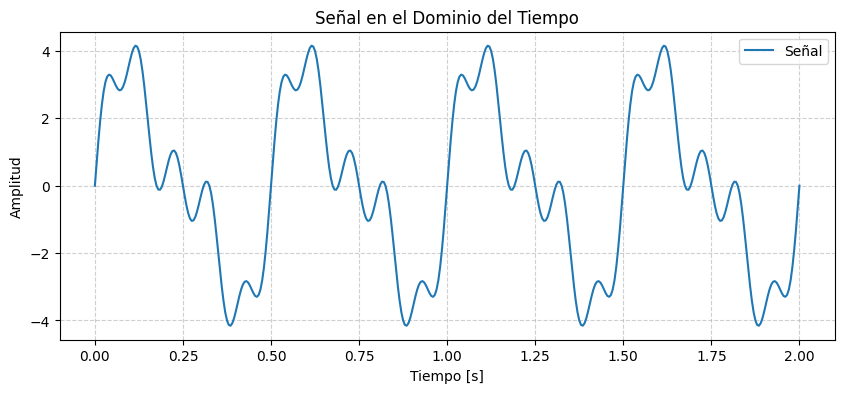

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la señal 
A1, A2, A3 = 3.0, 1.5, 1.0                           # Amplitudes
f1, f2, f3 = 2, 4, 10                                # Frecuencias (Hz)
w1, w2, w3 = 2*np.pi*f1, 2*np.pi*f2, 2*np.pi*f3      # rapidez angular (rad/s) 
T = 2                                                # Duración total de la señal (s)

fs = 20 * f3                       # frecuencia de muestreo (debe ser al menos el doble de la componente de mayor frecuencia) (Hz)            
dt = 1.0 / fs                      # tamaño de paso temporal

# Tiempo discreto
t = np.arange(start=0, step=dt, stop=T+dt)
N = len(t) # número de puntos de la señal

# Señal compuesta
y = A1 * np.sin(w1 * t) + A2 * np.sin(w2 * t) + A3 * np.sin(w3 * t)

# Gráficas
fig, ax = plt.subplots(figsize=(10, 4))

ax.plot(t, y, label="Señal")
ax.set_title("Señal en el Dominio del Tiempo")
ax.set_xlabel("Tiempo [s]")
ax.set_ylabel("Amplitud")
ax.grid(ls='--', alpha=0.6)
ax.legend()


Definir la DFT como una función en `Python`:

In [ ]:
# defina la función DFT aquí

def DFT(??):
    
    ???
    
    return ?


Calcular la DFT:


In [ ]:
# su código acá


La **DFT** transforma una señal del dominio del tiempo al dominio de la frecuencia, devolviendo números complejos. Cada componente complejo en la DFT corresponde a una frecuencia específica y está compuesto por:

- **Magnitud**: Indica la amplitud de la señal en esa frecuencia. Se calcula como:  
  $$|Y_n| = \sqrt{\text{Re}(Y_n)^2 + \text{Im}(Y_n)^2}$$

- **Fase**: Indica el desfase de la señal en esa frecuencia con respecto al origen. Se calcula como:  
  $$\phi_n = \arctan\left(\frac{\text{Im}(Y_n)}{\text{Re}(Y_n)}\right)$$

Estas dos características (magnitud y fase) permiten describir completamente las propiedades espectrales de la señal en cada frecuencia.


La magnitud de cada componente de la DFT está relacionada con la amplitud de las frecuencias presentes en la señal original:

<!-- Para señales reales, la amplitud de cada frecuencia puede recuperarse a partir de la magnitud ajustando por los factores de normalización adecuados. -->


In [ ]:
# Calcular la DFT y las frecuencias asociadas, además de graficar magnitud vs índice de frecuencia





La DFT aplicada en señales reales (como $y(t_k)$) genera un espectro simétrico, por lo que basta con analizar la primera mitad del espectro hasta $N//2$, ya que el resto es información redundante:

In [ ]:
# Tomar la primera mitad del espectro (hasta N//2) y grafique magnitude vs frecuencia



Dado que analizamos solo la primera mitad del espectro (por su simetría), es necesario escalar la amplitud por un factor de 2 para compensar la información redundante que no se incluye. Además, se normaliza por $N$, ya que la DFT no es unitaria, y esta normalización ajusta la magnitud para que coincida con la amplitud original de la señal:

$$ A_n = \frac{2}{N} |Y_n| $$

Recuerde que la señal original es:

$$ y(t)  = \textcolor{red}{3} \sin(4 \pi t) + \textcolor{red}{1.5} \sin(8 \pi t) + \textcolor{red}{1} \sin(20 \pi t) $$

In [ ]:
# Calcular amplitudes relacionadas con la señal original
# Además grafique la señal original y la DFT calculada



Para comparar, usaremos `fft` y `fftfreq` de `np.fft`, para llegar al mismo resultado (FFT: Fast Fourier Transform):

In [ ]:
# Parámetros de la señal
A1, A2, A3 = 3.0, 1.5, 1.0                           # Amplitudes
f1, f2, f3 = 2, 4, 10                                # Frecuencias (Hz)
w1, w2, w3 = 2*np.pi*f1, 2*np.pi*f2, 2*np.pi*f3      # rapidez angular (rad/s) 
T = 2                                                # Duración total de la señal (s)
fs = 20 * f3                                         # Frecuencia de muestreo
t = np.linspace(0, T, T * fs)                        # Tiempo de la señal

# Señal de la suma de tres senoidales
y = A1 * np.sin(w1 * t) + A2 * np.sin(w2 * t) + A3 * np.sin(w3 * t)

# FFT de la señal
N = len(y)
Y = np.fft.fft(y)
Y_module = np.abs(Y)  # Magnitud de la FFT

# Tomar la primera mitad del espectro (hasta N//2)
Y_module_positive = Y_module[:N // 2]

# Calcular amplitudes relacionadas con la señal original
amplitude = 2 / N * Y_module_positive  # Escalar la amplitud

# Cálculo de las frecuencias correspondientes
#omega_n = 2 * np.pi * np.arange(0, N//2) * fs / N
#f_n = omega_n / (2 * np.pi)

freqs = np.fft.fftfreq(N, d=1/fs)
freqs_positive = freqs[:N//2]

# Gráficas
fig, ax = plt.subplots(2, 1, figsize=(12, 6))

# Gráfico de la señal en el dominio del tiempo
ax[0].plot(t, y, label="Señal")
ax[0].set_title("Señal en el Dominio del Tiempo")
ax[0].set_xlabel("Tiempo [s]")
ax[0].set_ylabel("Amplitud")
ax[0].grid(ls='--', alpha=0.6)
ax[0].legend()

# Gráfico del espectro de frecuencia
#ax[1].stem(f_n, amplitude, linefmt='r', markerfmt='r.', basefmt='k', use_line_collection=True)
ax[1].stem(freqs_positive, amplitude, linefmt='r', markerfmt='r.', basefmt='k', use_line_collection=True)
ax[1].set_title("Espectro de Frecuencia (FFT numpy)")
ax[1].set_xlabel("Frecuencia [Hz]")
ax[1].set_ylabel("Magnitud")
ax[1].grid(ls='--', alpha=0.6)
ax[1].set_xlim(0, 12)
ax[1].set_ylim(0, 5)

# Añadir texto con las amplitudes y frecuencias solo para los 3 picos principales
peaks_frequencies = [f1, f2, f3]  # Las frecuencias conocidas de los picos
peaks_amplitudes = [A1, A2, A3]   # Las amplitudes conocidas de los picos

for peak_f, peak_a in zip(peaks_frequencies, peaks_amplitudes):
    # Encontrar el índice más cercano a la frecuencia del pico
    closest_index = np.argmin(np.abs(f_n - peak_f))
    # Añadir el texto con la amplitud y la frecuencia en un cuadro (bbox) en formato matemático (subíndices)
    ax[1].text(f_n[closest_index], amplitude[closest_index] + 0.4,  # Ajuste de posición hacia arriba (+0.1)
               r'$A_{' + str(peaks_amplitudes.index(peak_a) + 1) + '} = ' + str(peak_a) + r'$' + '\n' + 
               r'$f_{' + str(peaks_frequencies.index(peak_f) + 1) + '} = ' + str(peak_f) + r'$ Hz',
               fontsize=10, ha='center', va='bottom', bbox=dict(alpha=.3, facecolor='yellow', edgecolor='black', boxstyle='round,pad=0.3'))

# Ajuste de disposición y mostrar gráfico
fig.tight_layout()
plt.show()


Al calcular la **Transformada Discreta de Fourier (DFT)** (o la transformada rápida FFT) de una señal y analizar su espectro de frecuencias, se observa que los peaks en el espectro corresponden a las frecuencias de las ondas senoidales que componen la señal original, y su magnitud, corresponde a la amplitud de cada componente.

#### **Estudio con Ruido Añadido**

Ahora que hemos analizado una señal ideal, vamos a estudiar el comportamiento de la misma señal pero con la adición de ruido. Este tipo de análisis es útil para comprender cómo el ruido afecta a la transformada de Fourier y cómo puede dificultar la identificación precisa de las frecuencias de la señal original.

**Procedimiento:**

1. Se mantiene la misma señal ideal que en el estudio anterior.
2. Se añade ruido aleatorio de distribución normal (ruido blanco) a la señal.
3. Se realiza nuevamente la **FFT** sobre la señal ruidosa.
4. Se muestra el espectro de frecuencias de la señal ruidosa, destacando las diferencias con respecto a la señal original ideal.

In [ ]:
# Añadir ruido a la señal ideal
np.random.seed(0)  # Para reproducibilidad
noise = 2 * np.random.normal(0, 2, size=t.shape)  # Ruido blanco con media 0 y desviación estándar 2
y_noisy = y + noise  # Señal ruidosa

# FFT de la señal ruidosa




#### **Vamos con un ejemplo práctico: analizar una señal de audio**

Primero instalamos pyaudio para manejar archivos de audio en Python:

In [15]:
#!pip install pyaudio

Leemos y reproducimos el archivo `track_Am.wav`, que corresponde a un acorde de La menor de una guitarra eléctrica:

In [ ]:
from IPython.display import Audio

# Ruta del archivo de audio
audio_file = "track_Am.wav"

# Mostrar el reproductor de audio
Audio(audio_file, autoplay=True)

Ahora aplicamos transformada de Fourier:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

# Leer el archivo de audio
Fs, data = wavfile.read("track_Am.wav")  # Fs: frecuencia de muestreo, data: datos de la señal
if data.ndim > 1:  # Si el archivo tiene múltiples canales (estéreo), seleccionamos uno
    data = data[:, 0]

# Normalizamos los datos si están en formato int16
if data.dtype == np.int16:
    data = data / 32768.0  # Normalizar a rango [-1, 1]

# Variables de configuración
N = len(data)  # Tamaño total de los datos de audio
t_audio = np.arange(0, N) / Fs  # Tiempo en segundos


# Calcule transformada de Fourier usando FFT de numpy y grafique

Y_fft_values = ??
freqs_fft = ??


Grafiquemos un intervalo pequeño para observar periodicidades:

In [ ]:
fig = plt.figure(figsize=(12, 4))
plt.plot(t_audio[1000:1100], data[1000:1100], marker="x")

Ahora buscaremos los peaks de la transformada con `find_peaks` de `scipy.signal`:

In [ ]:
from scipy.signal import find_peaks

# Detectar picos en la FFT
peaks, properties = find_peaks(
    Y_fft_values,     # array donde buscaremos peaks
    height=0.3e7,     # altura mínima del peak
    threshold=0.1e7,  # diferencia mínima del peak con sus vecinos
    distance=50       # distancia entre peaks
)

# Extraer las frecuencias y magnitudes correspondientes a los picos
peak_frequencies = freqs_fft[peaks]
peak_magnitudes = Y_fft_values[peaks]

# Crear las gráficas
fig, (ax, ax1) = plt.subplots(2, 1, figsize=(10, 6))

# Señal en el dominio del tiempo
ax.plot(t_audio, data, 'r', lw=1)
ax.set_xlim(0, t_audio[-1])
ax.set_title("Señal de Audio en el Dominio del Tiempo")
ax.set_xlabel("Tiempo (s)")
ax.set_ylabel("Amplitud")
ax.grid(True)

# Espectro de frecuencia
ax1.semilogx(freqs_fft, Y_fft_values, 'b', lw=1)
ax1.set_xlim(1, 5000)  # Limitar a frecuencias de 1Hz a 5000Hz
ax1.set_ylim(0, np.max(Y_fft_values) * 1.1)
ax1.set_title("Espectro de Frecuencia")
ax1.set_xlabel("Frecuencia (Hz)")
ax1.set_ylabel("Magnitud")
ax1.grid(True)

# Marcar los picos en la gráfica de la FFT
ax1.plot(peak_frequencies, peak_magnitudes, "x", color="red", label="Peaks")
ax1.legend()

# Mostrar las gráficas
plt.tight_layout()
plt.show()




In [20]:
peak_frequencies.round()

array([108., 165., 195., 217., 262., 328., 389., 437., 524., 585., 657.,
       786., 874.])

Comparamos los peaks con las frecuencias de las **notas musicales**:

In [ ]:
import pandas as pd

# Notas musicales y sus frecuencias
notas = {
    "La2": 110.00, "Si2": 123.47,
    "Do3": 130.81, "Re3": 146.83, "Mi3": 164.81, "Fa3": 174.61, "Sol3": 196.00, "La3": 220.00, "Si3": 246.94,
    "Do4": 261.63, "Re4": 293.66, "Mi4": 329.63, "Fa4": 349.23, "Sol4": 392.00, "La4": 440.00, "Si4": 493.88,
    "Do5": 523.25, "Re5": 587.33, "Mi5": 659.26, "Fa5": 698.46, "Sol5": 783.99, "La5": 880.00,
}

df_notas = pd.DataFrame(columns=["Nota musical", "Frecuencia (Hz)"])
df_notas["Nota musical"] = notas.keys()
df_notas["Frecuencia (Hz)"] = notas.values()

df_notas


In [ ]:
# Crear las gráficas
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(10, 4))

# Espectro de frecuencia
ax.semilogx(freqs_fft, Y_fft_values, 'b', lw=1)
ax.set_xlim(1e2, 1e3)  # Limitar a frecuencias de 1Hz a 5000Hz
ax.set_ylim(0, np.max(Y_fft_values) * 1.1)
ax.set_title("Espectro de Frecuencia", pad=20)
ax.set_xlabel("Frecuencia (Hz)")
ax.set_ylabel("Magnitud")
#ax.grid(which="both", ls="--")

# Marcar los picos en la gráfica de la FFT
#ax.plot(peak_frequencies, peak_magnitudes, "x", color="red", label="Peaks")

for i in range(peak_frequencies.shape[0]):
    ax.text(peak_frequencies[i], peak_magnitudes[i], int(peak_frequencies[i]),
                    bbox=dict(
                    facecolor='yellow',  # Color de fondo
                    alpha=0.7,           # Transparencia
                    #edgecolor='none'     # Sin borde
                    boxstyle='round,pad=0.3'
                    ))
    
# Notas musicales y sus frecuencias
notas = {
    "La2": 110.00, "Si2": 123.47,
    "Do3": 130.81, "Re3": 146.83, "Mi3": 164.81, "Fa3": 174.61, "Sol3": 196.00, "La3": 220.00, "Si3": 246.94,
    "Do4": 261.63, "Re4": 293.66, "Mi4": 329.63, "Fa4": 349.23, "Sol4": 392.00, "La4": 440.00, "Si4": 493.88,
    "Do5": 523.25, "Re5": 587.33, "Mi5": 659.26, "Fa5": 698.46, "Sol5": 783.99, "La5": 880.00,
}

# Añadir etiquetas para las notas musicales
for nota, freq in notas.items():
    if 1 <= freq <= 5000:
        # Dibujar líneas verticales para cada nota
        ax.axvline(x=freq, color='green', linestyle='--', lw=0.8)
        # Añadir etiquetas para las notas
        ax.text(
            freq,
            1.02,  # Coordenada fija para posicionar las etiquetas
            nota,
            verticalalignment='bottom',
            horizontalalignment='center',
            fontsize=8,
            fontweight="bold",
            bbox=dict(
                boxstyle="round,pad=0.3",
                edgecolor="black",
                facecolor="#beffb8",
                alpha=0.9
            ),
            transform=ax.get_xaxis_transform()
        )


# Mostrar las gráficas
plt.tight_layout()
plt.show()

#fig.savefig("spectrum.png", dpi=300, bbox_inches='tight', transparent=False)

#### **Analizando en tiempo real:**

generador de tonos: https://www.onlinemictest.com/es/generador-de-tonos/

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pyaudio as pa
import struct


import matplotlib
matplotlib.use('TkAgg')

# Parámetros de configuración
FRAMES = 1024 * 8             # Tamaño del paquete de audio a procesar
FORMAT = pa.paInt16           # Formato de lectura INT 16 bits
CHANNELS = 1                  # Mono
Fs = 44100                    # Frecuencia de muestreo típica para audio

# Inicializamos PyAudio
p = pa.PyAudio()

# Abrimos el stream de audio
stream = p.open(
    format=FORMAT,
    channels=CHANNELS,
    rate=Fs,
    input=True,
    output=True,
    frames_per_buffer=FRAMES
)

# Creamos la figura y los ejes
fig, (ax, ax1) = plt.subplots(2, 1, figsize=(10, 6))

# Ejes para la señal en el dominio del tiempo
t_audio = np.arange(0, FRAMES) / Fs  # Tiempo en segundos para el eje X
y_audio, = ax.plot(t_audio, np.random.rand(FRAMES), 'r', lw=1.3)
ax.set_xlim(0, FRAMES / Fs)
ax.set_title("Señal de Audio en el Dominio del Tiempo")
ax.set_xlabel("Tiempo (s)")
ax.set_ylabel("Amplitud")
ax.grid(True)

# Ejes para el espectro de frecuencia (FFT)
freqs_fft = np.linspace(0, Fs / 2, FRAMES // 2)  # Frecuencias para el gráfico de la FFT
Y_fft, = ax1.semilogx(freqs_fft, np.random.rand(FRAMES // 2), 'b', lw=1.3)
ax1.set_xlim(1, 5000)  # Limitar a frecuencias de 1Hz a 5000Hz
#ax1.set_title("Espectro de Frecuencia")
ax1.set_xlabel("Frecuencia (Hz)")
ax1.set_ylabel("Magnitud")
#ax1.grid(True)

# Notas musicales y sus frecuencias
notas = {
    "La2": 110.00, "Si2": 123.47,
    "Do3": 130.81, "Re3": 146.83, "Mi3": 164.81, "Fa3": 174.61, "Sol3": 196.00, "La3": 220.00, "Si3": 246.94,
    "Do4": 261.63, "Re4": 293.66, "Mi4": 329.63, "Fa4": 349.23, "Sol4": 392.00, "La4": 440.00, "Si4": 493.88,
    "Do5": 523.25, "Re5": 587.33, "Mi5": 659.26, "Fa5": 698.46, "Sol5": 783.99, "La5": 880.00,
}

# Crear un segundo eje para las notas
ax2 = ax1.twiny()
ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks([])
ax2.set_yticks([])
ax2.spines['bottom'].set_visible(False)

# Añadir etiquetas para las notas musicales
for nota, freq in notas.items():
    if 1 <= freq <= 5000:
        # Dibujar líneas verticales para cada nota
        ax1.axvline(x=freq, color='green', linestyle='--', lw=0.8)
        # Añadir etiquetas para las notas
        ax1.text(
            freq,
            1,  # Coordenada fija para posicionar las etiquetas
            nota,
            verticalalignment='bottom',
            horizontalalignment='center',
            fontsize=8,
            fontweight="bold",
            bbox=dict(
                boxstyle="round,pad=0.3",
                edgecolor="black",
                facecolor="#beffb8",
                alpha=0.9
            ),
            transform=ax1.get_xaxis_transform()
        )

# Sincronizar el diseño
fig.tight_layout()

# Vector de frecuencias para el análisis
F = (Fs / FRAMES) * np.arange(0, FRAMES // 2)

# Bucle principal para capturar audio y actualizar las gráficas
plt.ion()
while True:
    try:
        # Leemos datos del micrófono
        data = stream.read(FRAMES, exception_on_overflow=False)
        dataInt = struct.unpack(str(FRAMES) + 'h', data)  # Convertir datos de bytes a enteros

        # Actualizar datos en el dominio del tiempo
        y_audio.set_ydata(dataInt)
        ax.set_ylim(np.min(dataInt) - 500, np.max(dataInt) + 500)

        # Calcular la FFT y actualizar el espectro de frecuencia
        Y_fft_values = 2 * np.abs(np.fft.fft(dataInt) / FRAMES)[:FRAMES // 2]
        Y_fft.set_ydata(Y_fft_values)
        ax1.set_ylim(0, np.max(Y_fft_values) * 1.1)
        ax1.set_xlim(1e2, 1e3)

        # Encontrar la frecuencia dominante
        Posm = np.argmax(Y_fft_values)
        F_fund = F[Posm]
        print(f"\rFrecuencia Dominante: {F_fund:.2f} Hz", end="")

        # Refrescar la gráfica
        fig.canvas.draw()
        fig.canvas.flush_events()

    except KeyboardInterrupt:
        print("\nFinalizando...")
        break

# Cerrar el stream y PyAudio
stream.stop_stream()
stream.close()
p.terminate()


Frecuencia Dominante: 21.53 Hzzzz

<div style="background-color: #d9ffd4; color: black; padding: 10px; border-radius: 5px;">

**Conclusión:**

En esta jornada de trabajo definimos y estudiamos, tanto desde un punto de vista teórico como computacional, la serie de Fourier y la transformada de Fourier como herramientas fundamentales para el análisis de señales. La serie de Fourier permitió comprender cómo una función periódica puede descomponerse en un conjunto discreto de modos armónicos, mientras que la transformada de Fourier generalizó esta idea a señales no periódicas, proporcionando una descripción continua en el dominio de la frecuencia.

La transformada de Fourier resulta especialmente útil para analizar el espectro de frecuencias de una señal, permitiendo identificar las componentes dominantes que la constituyen. Esto es clave para estudiar características tonales y espectrales, como en el caso de una grabación de un acorde de guitarra, donde cada pico del espectro se asocia a una nota fundamental y sus armónicos, responsables del timbre del sonido.

Además, estas herramientas permiten filtrar ruido, separar información relevante de perturbaciones no deseadas y analizar señales reales de manera eficiente mediante técnicas discretas como la FFT. En astrofísica, la transformada de Fourier es esencial para el estudio de la radiación electromagnética proveniente de estrellas y planetas, ya que posibilita la identificación de líneas espectrales asociadas a elementos químicos, aportando información crucial sobre la composición, temperatura y propiedades físicas de los cuerpos celestes.

</div>


<div style="padding: 15px; border-top: 2px solid #2F4F4F; margin-top: 30px; background-color: var(--custom-bg-color); color: var(--custom-text-color);">
    <p style="font-family: Calibri, sans-serif; text-align: left; font-size: 16px;">
        Omar Fernández <br>
        Profesor de Física Computacional IV para Astrofísica <br>
        Ingeniero Físico <br>
        <a href="mailto:omar.fernandez.o@usach.cl" class="email-link">omar.fernandez.o@usach.cl</a> <br>
    </p>
</div>

<style>
:root {
    --custom-bg-color: #F8F8F8;
    --custom-text-color: #2F4F4F;
    --custom-link-color: blue;
}

@media (prefers-color-scheme: dark) {
    :root {
        --custom-bg-color: #444444;
        --custom-text-color: #F8F8F8;
        --custom-link-color: magenta;
    }
}

.email-link {
    color: var(--custom-link-color);
}
</style>
